In [1]:
suppressPackageStartupMessages({
  library(ggplot2)
  library(patchwork)
  library(GenomicRanges)
  library(rtracklayer)
  library(Seurat)
  library(Signac)
  library(dplyr)
  library(Pando)
  library(BSgenome.Hsapiens.UCSC.hg38)
})

In [2]:
# read in the dataseurat_object <- readRDS('{PATH_1}')seurat_object <- seurat_object@data# change assay to atacDefaultAssay(seurat_object) <- "ATAC"# Subset the Seurat object for specific identsseurat_object <- subset(seurat_object, idents = c("DMSO_NT", "DASA_NT", "DASA_HIC2"))seurat_object

An object of class Seurat 
344955 features across 4651 samples within 4 assays 
Active assay: ATAC (279098 features, 0 variable features)
 2 layers present: counts, data
 3 other assays present: SCT, RNA, PRTB
 5 dimensional reductions calculated: integrated_lsi, atac.umap, pca, rna.umap, wnn.umap

In [3]:
levels(seurat_object) <- c("DMSO_NT", "DASA_NT", "DASA_HIC2")

In [4]:
# table of cell counts
table(Idents(seurat_object))


  DMSO_NT   DASA_NT DASA_HIC2 
     1661      2615       375 

In [5]:
# Add cell type information to the Seurat object meta data using idents
seurat_object$cell_type <- Idents(seurat_object)


In [6]:
# Extract accessibility data from the Seurat object
accessibility_data <- seurat_object[["ATAC"]]

In [7]:
accessibility_data

ChromatinAssay data with 279098 features for 4651 cells
Variable features: 0 
Genome: hg38 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 16 

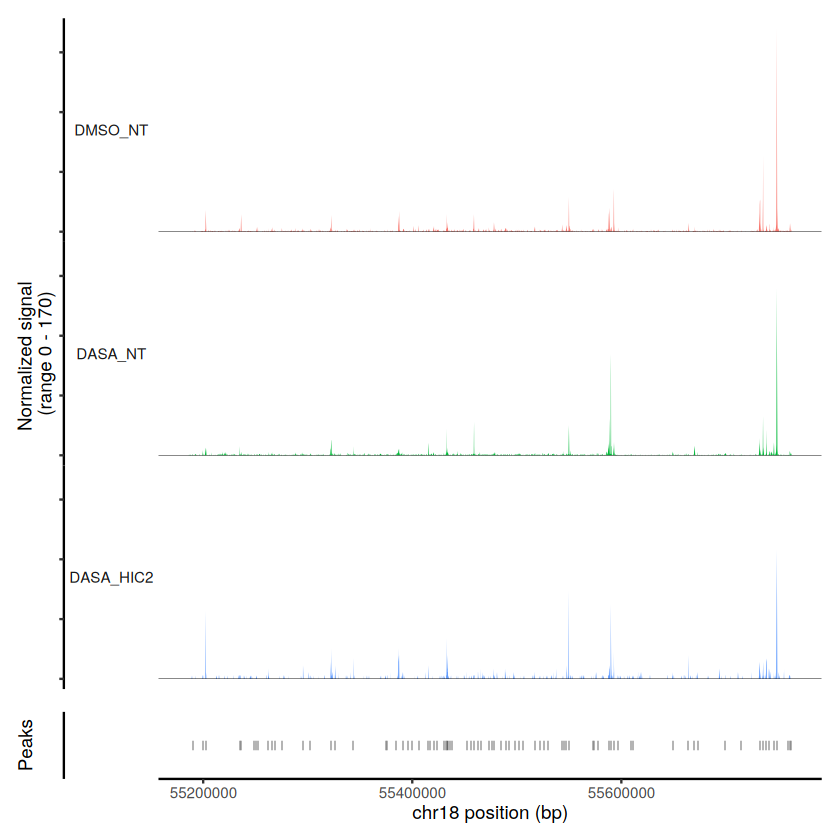

In [8]:
cov_plot <- CoveragePlot(
  object = seurat_object,
  region = "chr18-55186072-55762857",
  annotation = FALSE,
  peaks = TRUE
  #extend.upstream = 50000,
  #extend.downstream = 50000,
)
cov_plot

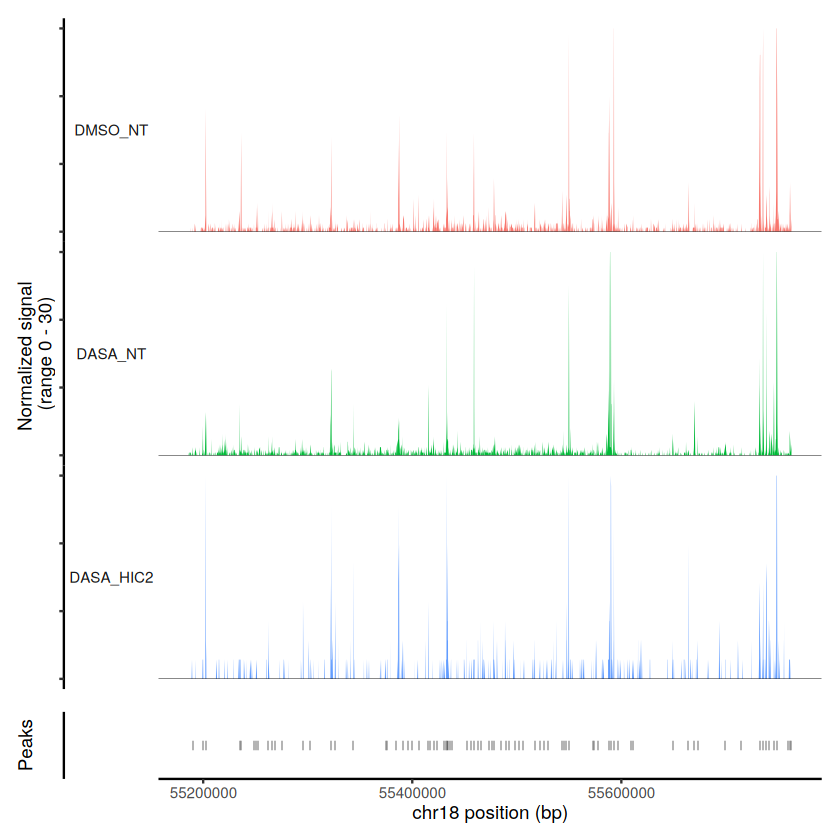

In [9]:
cov_plot <- CoveragePlot(
  object = seurat_object,
  region = "chr18-55186072-55762857",
  annotation = FALSE,
  peaks = TRUE,
  # extend.upstream = 5000,
  # extend.downstream = 5000,
  ymax = 30
)
cov_plot

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`).”


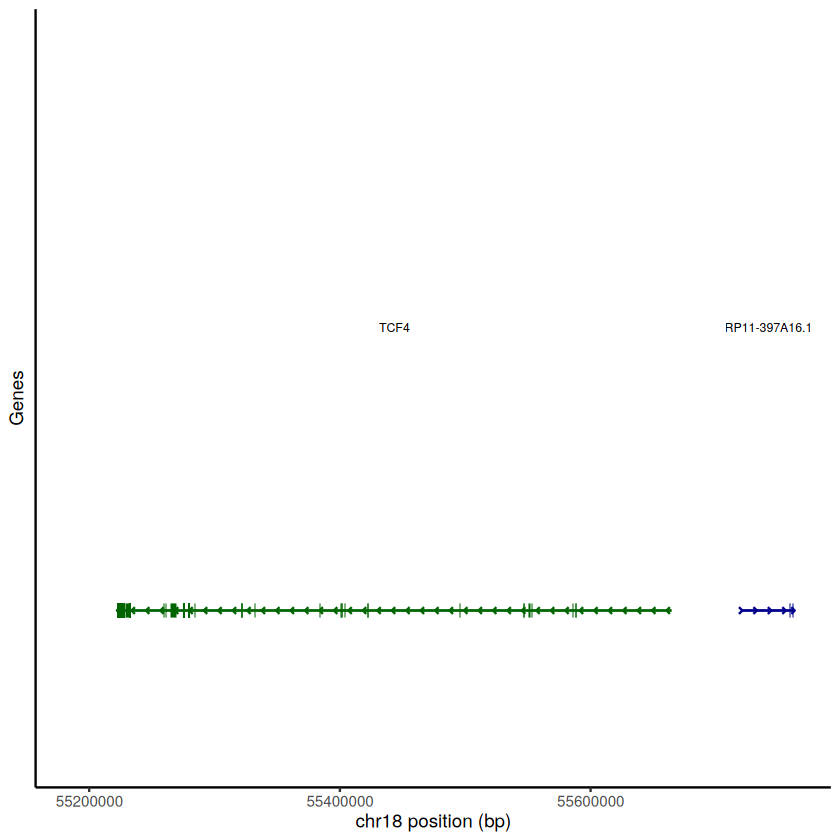

In [10]:
gene_plot <- AnnotationPlot(
  object = seurat_object,
  region = "chr18-55186072-55762857"
)
gene_plot

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`).”


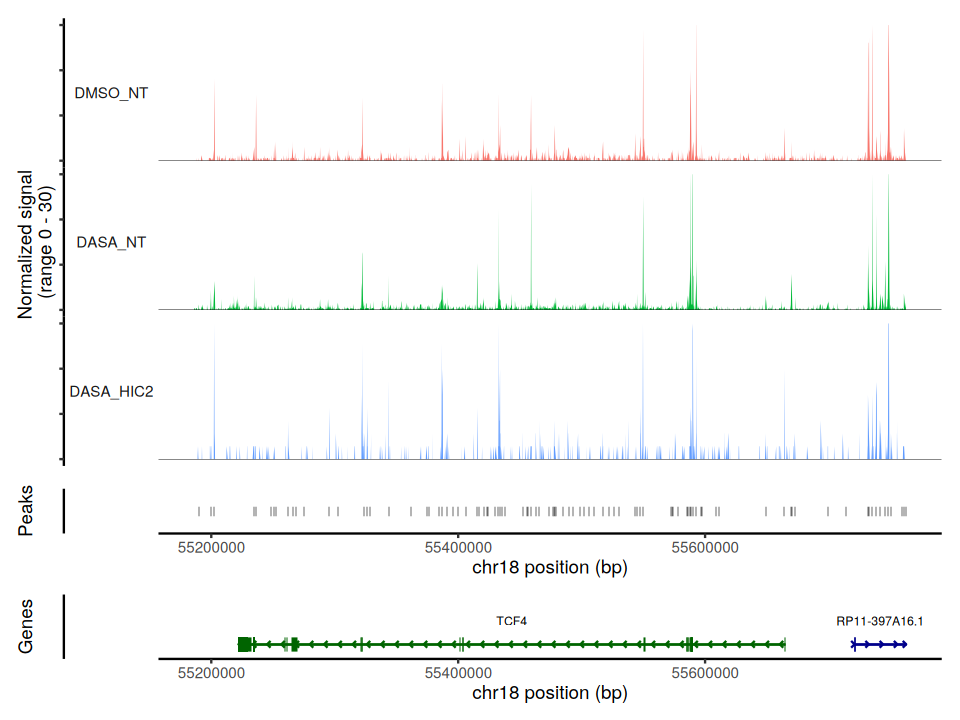

In [11]:
options(repr.plot.width=8, repr.plot.height=6)
combined_plot <- CombineTracks(
  plotlist = list(cov_plot, gene_plot),
)
combined_plot

In [12]:
# regulatory_regions <- data.frame(
#   start = c(21400000, 21420000, 21440000, 21460000),
#   end = c(21410000, 21430000, 21450000, 21470000),
#   type = c("Activating", "Repressing", "Activating", "Repressing"),
#   name = c("Enhancer1", "Silencer1", "Enhancer2", "Silencer2"),
#   gene = c("HIC2", "HIC2", "UBE2L3", "UBE2L3")
# )

In [13]:
coefs <- read.csv('{PATH_2}', row.names = 1)

In [14]:
head(coefs)

,tf,target,region,term,estimate,std_err,statistic,pval,padj,corr
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,HMGA2,IL3RA,chrX-1239459-1240394,HMGA2:chrX_1239459_1240394,-0.003034754,0.03107030,-0.09767378,9.221938e-01,9.967800e-01,0.1524199
2,HMGA2,IL3RA,chrX-1249271-1250179,HMGA2:chrX_1249271_1250179,0.260591060,0.01340771,19.43590676,2.976427e-82,1.036489e-79,0.1524199
3,RLF,TBL1X,chrX-9369535-9370460,chrX_9369535_9370460:RLF,-0.005745815,0.05598099,-0.10263868,9.182526e-01,9.964553e-01,0.1576562
4,HIVEP3,TBL1X,chrX-9369535-9370460,chrX_9369535_9370460:HIVEP3,0.089890298,0.07973663,1.12734010,2.596361e-01,8.288942e-01,0.2333268
5,MECOM,TBL1X,chrX-9369535-9370460,chrX_9369535_9370460:MECOM,0.021645399,0.12719142,0.17017971,8.648736e-01,9.934819e-01,0.1320205
6,MXD4,TBL1X,chrX-9369535-9370460,chrX_9369535_9370460:MXD4,0.479336594,0.23404363,2.04806511,4.058960e-02,4.632811e-01,-0.1231881


In [15]:
subset_coefs <- coefs[(coefs$target == "TCF4") & (coefs$pval < 0.05), ]
print(dim(subset_coefs))
head(subset_coefs)


[1] 79 10


,tf,target,region,term,estimate,std_err,statistic,pval,padj,corr
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
316762,GATA2,TCF4,chr18-55163264-55164185,chr18_55163264_55164185:GATA2,0.21249550,0.07660472,2.773922,0.0055543666,0.16081142,-0.2949708
316764,MEF2C,TCF4,chr18-55163264-55164185,chr18_55163264_55164185:MEF2C,-0.07270496,0.02831778,-2.567467,0.0102667126,0.23337539,-0.1423652
316816,ETV1,TCF4,chr18-55202012-55202922,ETV1:chr18_55202012_55202922,-0.23475791,0.06952265,-3.376711,0.0007379004,0.03848247,-0.2402541
316858,ETV1,TCF4,chr18-55235918-55236927,ETV1:chr18_55235918_55236927,-0.16295586,0.07260385,-2.244452,0.0248369845,0.37229606,-0.2402541
316868,KLF13,TCF4,chr18-55235918-55236927,chr18_55235918_55236927:KLF13,0.21683017,0.10973219,1.975994,0.0481978318,0.49692863,0.1188633
316927,ZNF117,TCF4,chr18-55261775-55262816,ZNF117:chr18_55261775_55262816,0.50393761,0.17132938,2.941338,0.0032795555,0.11358346,0.2045624


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`).”


Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`).”


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_text()`).”


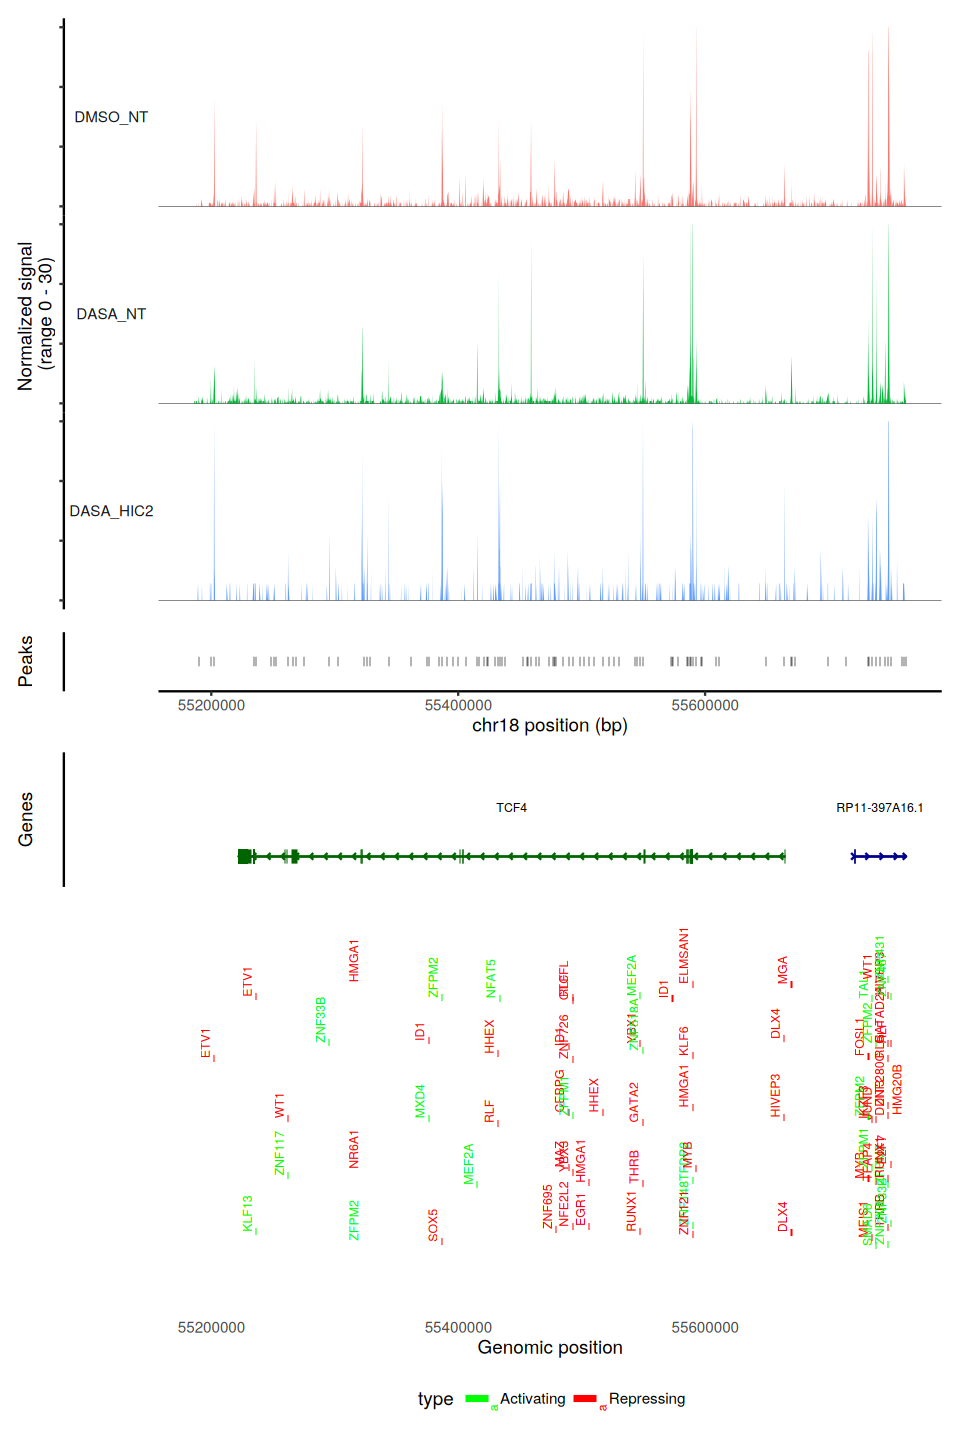

In [16]:
options(repr.plot.width=8, repr.plot.height=12)
regulatory_regions <- data.frame(
  start = as.numeric(sub(".*-(\\d+)-\\d+", "\\1", subset_coefs$region)),
  end = as.numeric(sub(".*-\\d+-(\\d+)", "\\1", subset_coefs$region)),
  type = ifelse(subset_coefs$corr < 0, "Repressing", "Activating"),
  name = subset_coefs$tf
)

# start and end coords of the region of interest (chr18:55186072-55762857)
start_coord <- 55186072
end_coord <- 55762857

plot_regulatory_regions <- function(regulatory_regions, start_coord, end_coord) {
  # Add a y-position column with more levels and jitter
  n_levels <- 5
  regulatory_regions$y_pos <- (seq_len(nrow(regulatory_regions)) %% n_levels) - (n_levels %/% 2)
  regulatory_regions$y_pos <- regulatory_regions$y_pos + runif(nrow(regulatory_regions), -0.2, 0.2)

  ggplot() +
    geom_segment(data = regulatory_regions, 
                 aes(x = start, xend = end, 
                     y = y_pos, yend = y_pos, 
                     color = type), 
                 size = 1.5) +
    geom_text(data = regulatory_regions, 
              aes(x = (start + end)/2, 
                  y = y_pos, 
                  label = name, 
                  color = type), 
              vjust = -0.5, 
              size = 2.5, 
              angle = 90, 
              hjust = 0) +
    scale_color_manual(values = c(Activating = "green", Repressing = "red")) +
    scale_x_continuous(limits = c(start_coord, end_coord)) +
    scale_y_continuous(limits = c(-3, 3)) +
    theme_minimal() +
    theme(axis.title.y = element_blank(),
          axis.text.y = element_blank(),
          axis.ticks.y = element_blank(),
          panel.grid = element_blank(),
          legend.position = "bottom") +
    labs(x = "Genomic position")
}

# Use the function with all regulatory regions
p_regulatory <- plot_regulatory_regions(regulatory_regions, start_coord, end_coord)

# Update the final combined plot
final_plot <- CombineTracks(
  plotlist = list(cov_plot, gene_plot, p_regulatory),
  heights = c(5, 1, 3)  # Increased the height of the regulatory plot
)
final_plot

In [17]:
head(regulatory_regions)

,start,end,type,name
,<dbl>,<dbl>,<chr>,<chr>
1,55163264,55164185,Repressing,GATA2
2,55163264,55164185,Repressing,MEF2C
3,55202012,55202922,Repressing,ETV1
4,55235918,55236927,Repressing,ETV1
5,55235918,55236927,Activating,KLF13
6,55261775,55262816,Activating,ZNF117


In [18]:
# Get the ranges
# Replace the first hyphen with a colon
fixed_ranges <- sub("-", ":", row.names(seurat_object[["ATAC"]]))

# Create a GRanges object
ranges <- GRanges(fixed_ranges)

# Set the genome info
seqlevelsStyle(ranges) <- "UCSC"
genome(ranges) <- "hg38"

# Replace the ranges in the assay
seurat_object[["ATAC"]]@ranges <- ranges
#####
#####

seurat_object[["ATAC"]] <- RegionStats(
  object = seurat_object[["ATAC"]],
  genome = BSgenome.Hsapiens.UCSC.hg38
)

In [19]:
seurat_object

An object of class Seurat 
344955 features across 4651 samples within 4 assays 
Active assay: ATAC (279098 features, 0 variable features)
 2 layers present: counts, data
 3 other assays present: SCT, RNA, PRTB
 5 dimensional reductions calculated: integrated_lsi, atac.umap, pca, rna.umap, wnn.umap

In [20]:
saveRDS(seurat_object, '{PATH_3}')

In [21]:
seurat_object <- LinkPeaks(
  object = seurat_object,
  peak.assay = "ATAC",
  expression.assay = "SCT",
  genes.use = NULL
)

Testing 17899 genes and 189831 peaks



Found gene coordinates for 13233 genes



In [22]:
saveRDS(seurat_object, '{PATH_4}')# seurat_object <- readRDS('{PATH_5}')

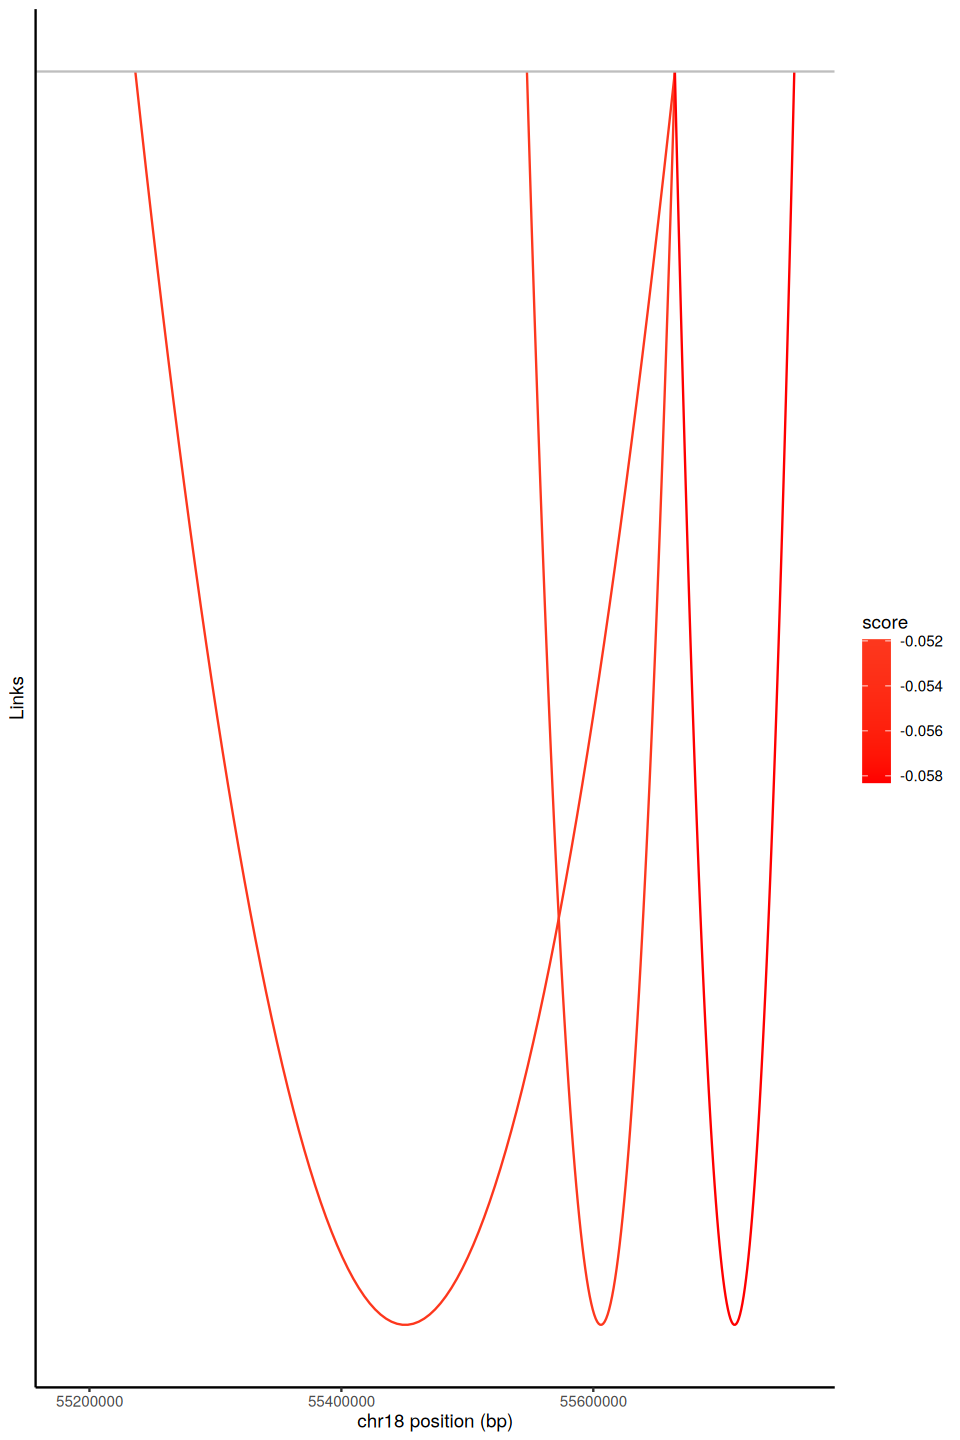

In [23]:
link_plot <- LinkPlot(
  object = seurat_object,
  region = "chr18-55186072-55762857",
  min.cutoff = 0
)
link_plot

Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_segment()`).”


Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`).”


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_text()`).”


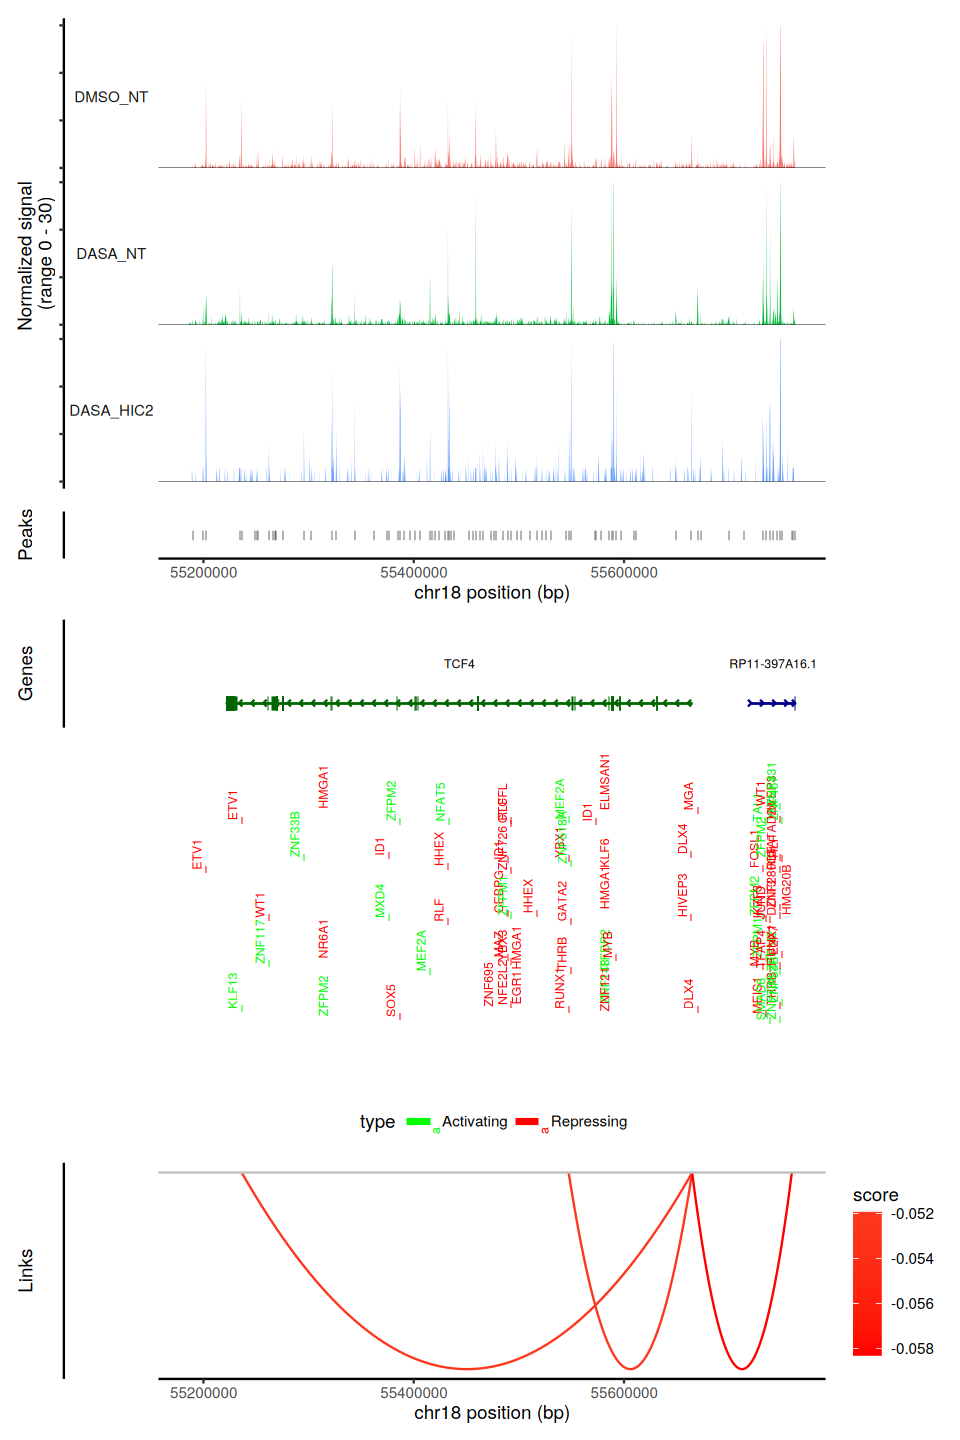

In [24]:
# Update the final combined plot to have links
final_plot <- CombineTracks(
  plotlist = list(cov_plot, gene_plot, p_regulatory, link_plot),
  heights = c(5, 1, 3, 2)  # Increased the height of the regulatory plot
)
final_plot